In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
'''
this can let figure activative
%matplotlib notebook
'''


# https://matplotlib.org/index.html
# see matplotlib documentation

x = np.linspace(-10,10,100)
y = np.cos(x)
y1 = np.sin(x)
plt.figure()
plt.plot(x,y,label='cos')
plt.plot(x,y1,label= 'sin',color='red',linewidth=1)
plt.xlim(-5,5)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
#plt.yticks([-1,0,1],['$low$','med','high'])


# this is setting the x and y axis
ax=plt.gca()   # get current axis
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')  # set default x,y axis
ax.yaxis.set_ticks_position('left')    # but not necessary, because x,y defauct is bottom and left
ax.spines['bottom'].set_position(('data',-1))     # moving the axis   ('data', 'outward', 'axis')
ax.spines['left'].set_position(('data',0))        # set position has others function can be used
plt.legend(loc='best')
plt.show()
plt.figure()


#======another figure====
y2=y+y1
plt.plot(x,y2,label='combi',color='black')
plt.plot(x,y,label='cos')
plt.plot(x,y1,label='sin')
plt.legend(loc='best')
plt.xlim(-8,8)
plt.ylim(-2,2)

# ===set axis also can use this method ==
#ax = plt.gca()
#ax.axis((-10,10,-10,10))  # **kwargs
#==============================



plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

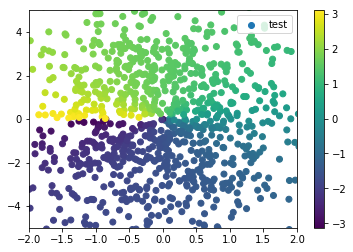

In [2]:
## scatter image
plt.figure()
xx1= np.random.normal(0,1,1000)
yy2= np.random.normal(0,3,1000)
color_scatter  = np.arctan2(yy2,xx1)

plt.scatter(xx1,yy2,c=color_scatter,label='test')
ax = plt.gca()
ax.axis((-2,2,-5,5)) #xl,xh,yl,yh

#plt.xticks(())  #hide the axis ticks
#plt.yticks(())
plt.colorbar()
plt.legend()


(-1.5, 1.5)

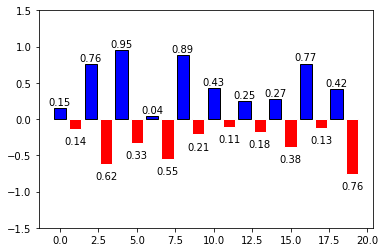

In [3]:
## bar image

plt.figure()
xb = np.arange(0,20,2)
index = (np.random.uniform(0,1,10))  # number of x and y must be equal
index2 = (np.random.uniform(0,1,10))
plt.bar(xb,index, facecolor = 'blue', edgecolor='black')
plt.bar(xb+1, -index2, facecolor = 'red', edgecolor = 'white')

# add text
for x,y in zip(xb, index):
    plt.text(x,y+0.15,'%.2f' %y, ha='center', va= 'top')
    
for x,y in zip(xb, index2):
    plt.text(x+1,-y-0.1,'%.2f' %y, ha='center', va= 'top')
plt.ylim(-1.5,1.5)

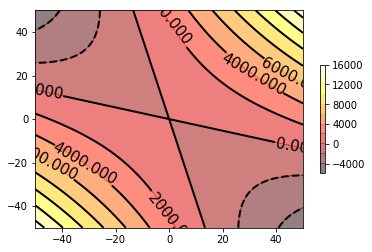

In [4]:
#contour image

plt.figure()

xc=np.linspace(-50,50,1000)
yc=np.linspace(-50,50,1000)
Xc,Yc = np.meshgrid(xc,yc)
Zc = ((Xc**2+Yc**2)+(4*Xc*Yc))

ax = plt.gca()
ax.axis((-50,50,-50,50))

# plot contour line
C = plt.contour(Xc,Yc,Zc,10,colors='black',linewidths=2)

# setting color map
plt.contourf(Xc,Yc,Zc,10,alpha=.5,cmap=plt.cm.hot) # alpha== transparent, cmap = color map

# show the hieght
plt.clabel(C, inline=True, fontsize = 15) # must send in the contour object

plt.colorbar(shrink=.5)

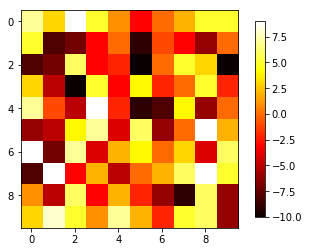

In [5]:
# image

'''
see interpolation information at:
https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
'''
plt.figure()

x = np.random.randint(-10,10,(10,10))
plt.imshow(x,interpolation='nearest',cmap='hot',origin='upper')
plt.colorbar(shrink=.9)

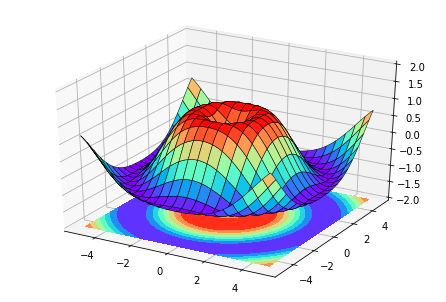

In [6]:
# 3D image
from mpl_toolkits.mplot3d import Axes3D


new = plt.figure()
axx =Axes3D(new)

X3 = np.linspace(-5,5,100)
Y3 = np.linspace(-5,5,100)
x3,y3 = np.meshgrid(X3,Y3)
z3 = np.sin(np.sqrt(x3**2+y3**2))

axx.plot_surface(x3,y3,z3,rstride=5, cstride= 5,edgecolor= 'black',linewidth=.5, cmap='rainbow')
axx.contourf(x3,y3,z3,zdir='z',offset = -2,cmap = 'rainbow')
axx.set_zlim(-2,2)



plt.show()

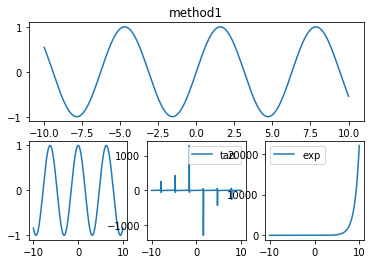

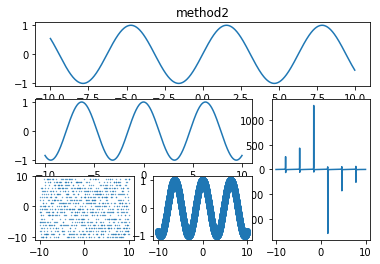

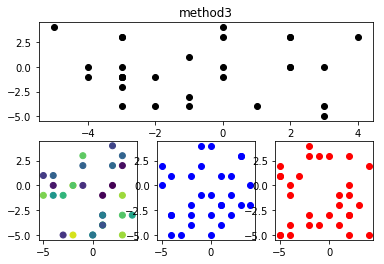

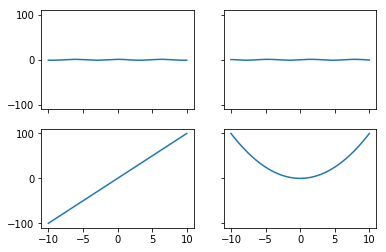

In [7]:
# subplot

plt.figure()

#===== method 1 =====
rx = np.linspace(-10,10,1000)
plt.subplot(2,1,1)
plt.plot(rx, np.sin(rx),label='sin')
plt.title('method1')
plt.subplot(234)
plt.plot(rx, np.cos(rx),label='cos')
plt.subplot(235)
plt.plot(rx, np.tan(rx),label='tan')
plt.legend()   # need to follow each subplot
plt.subplot(236)
plt.plot(rx, np.exp(rx),label='exp')
plt.legend()
plt.show()



#===== method 2 =====
# use subplotgrid to split plot
plt.figure()
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax1.plot(rx,np.sin(rx))
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2)
ax2.plot(rx,np.cos(rx))
ax3 = plt.subplot2grid((3,3),(1,2),rowspan=2)
ax3.plot(rx,np.tan(rx))
ax4 = plt.subplot2grid((3,3),(2,0))
ax4.scatter(rx,np.random.randint(-10,10,1000),s=.1,cmap='rainbow')
ax5 = plt.subplot2grid((3,3),(2,1))
ax5.scatter(rx,np.cos(rx))
ax1.set_title('method2')

#========method 3 =======
# gridspec, this is similar to method1
plt.figure()
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,3)

ax1 = plt.subplot(gs[0,:])
ax1.scatter(np.random.randint(-5,5,30),np.random.randint(-5,5,30),c='black')
plt.title('method3')
ax2 = plt.subplot(gs[1,0])
ax2.scatter(np.random.randint(-5,5,30),np.random.randint(-5,5,30),c=np.random.randint(0,254,30))
ax3 = plt.subplot(gs[1,1])
ax3.scatter(np.random.randint(-5,5,30),np.random.randint(-5,5,30),c='blue')
ax4 = plt.subplot(gs[1,2])
ax4.scatter(np.random.randint(-5,5,30),np.random.randint(-5,5,30),c='red')




#==== method 4 =====
# share axes  , subplotsss

f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex =True, sharey = True)


ax1.plot(rx,np.cos(rx))
ax2.plot(rx,np.sin(rx))
ax3.plot(rx,rx*10)
ax4.plot(rx,rx**2)

